# Sales Analysis (Pandas, Numpy, Seaborn & Matplotlib)

##### imports libraries

In [1]:
import os
import numpy as np
import pandas as pd

#### Merging 12 months of sales data into a single csv_file

In [2]:
df=pd.read_csv(r"C:\Users\SRKT\Desktop\Sales_Data\data\Sales_April_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
path=r"C:\Users\SRKT\Desktop\Sales_Data\data"    #\new line (escape character)

files=[file for file in os.listdir(path)]

all_months_data=pd.DataFrame()
for file in files:
    df=pd.read_csv(path+"\\"+file)
    all_months_data=pd.concat([all_months_data,df])

In [4]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


##### Cleaning The Data

In [5]:
all_months_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
all_data=all_months_data.dropna(axis=0)

In [12]:
all_data=all_data[all_data["Month"].str[0:2]!='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


##### Adding Months Columns

In [13]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype("int")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [14]:
all_data["Quantity Ordered"]=pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"]=pd.to_numeric(all_data["Price Each"])

In [15]:
all_data["Sales"]=all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Best months for sales and how much was earned that month

In [16]:
a=all_data.groupby("Month").sum().reset_index()
a

,Month,Quantity Ordered,Price Each,Sales
0,1,10903,1.811768e+06,1.822257e+06
1,2,13449,2.188885e+06,2.202022e+06
2,3,17005,2.791208e+06,2.807100e+06
3,4,20558,3.367671e+06,3.390670e+06
4,5,18667,3.135125e+06,3.152607e+06
5,6,15253,2.562026e+06,2.577802e+06
6,7,16072,2.632540e+06,2.647776e+06
7,8,13448,2.230345e+06,2.244468e+06
8,9,13109,2.084992e+06,2.097560e+06
9,10,22703,3.715555e+06,3.736727e+06


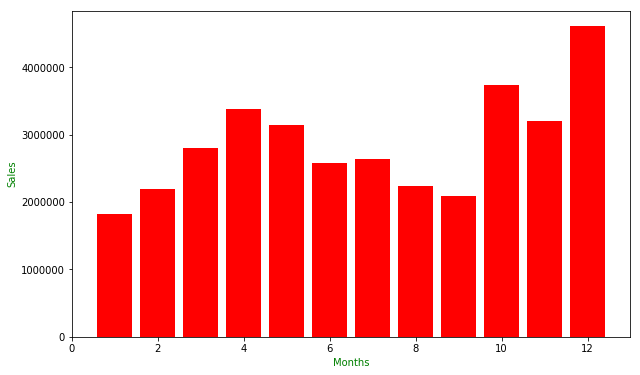

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
months=range(1,13)
plt.bar(months,a["Sales"],color="red")
plt.xlabel("Months",color="green")
plt.ylabel("Sales",color="green")
plt.show()

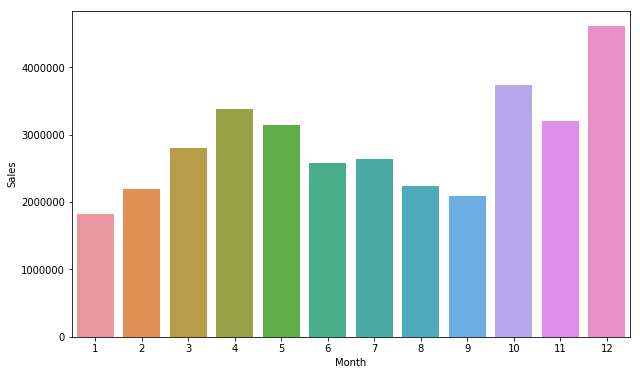

In [20]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(a["Month"],a["Sales"])

### City which has higest no of Sales

In [21]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [22]:
#Adding City column to Dataset
def city_name(address):
    return address.split(',')[1]

all_data["City"]=all_data["Purchase Address"].apply(lambda x:city_name(x))

In [23]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [30]:
b=all_data.groupby("City").sum().reset_index()
b

,City,Quantity Ordered,Price Each,Month,Sales
0,Atlanta,16602,2.779908e+06,104794,2.795499e+06
1,Austin,11153,1.809874e+06,69829,1.819582e+06
2,Boston,22528,3.637410e+06,141112,3.661642e+06
3,Dallas,16730,2.752628e+06,104620,2.767975e+06
4,Los Angeles,33289,5.421435e+06,208325,5.452571e+06
5,New York City,27932,4.635371e+06,175741,4.664317e+06
6,Portland,14053,2.307747e+06,87765,2.320491e+06
7,San Francisco,50239,8.211462e+06,315520,8.262204e+06
8,Seattle,16553,2.733296e+06,104941,2.747755e+06


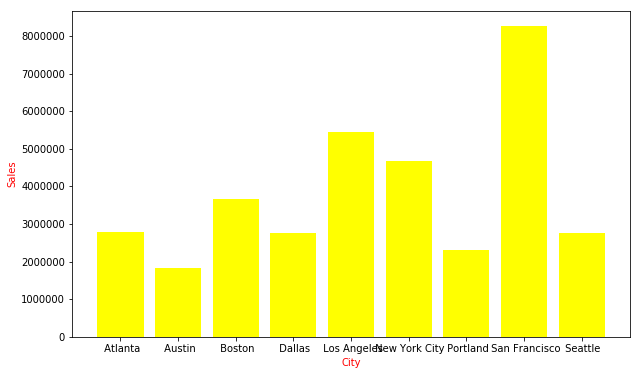

In [39]:
plt.figure(figsize=(10,6))

plt.xlabel("City",color="red")
plt.ylabel("Sales",color="red")
plt.bar(b["City"],b["Sales"],color="yellow")
plt.show()

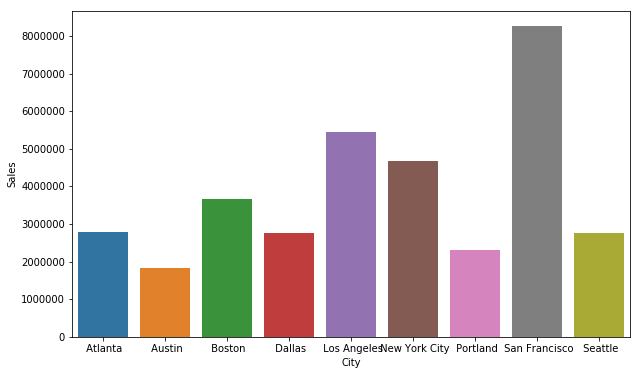

In [76]:
plt.figure(figsize=(10,6))
sns.barplot(b["City"],b["Sales"])
plt.show()

### Which Time the advertisements should display so maximum customer is buying

In [41]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [58]:
all_data["Order Date"]=pd.to_datetime(all_data["Order Date"])

In [59]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [60]:
all_data["Hour"]=all_data["Order Date"].dt.hour
all_data["Min"]=all_data["Order Date"].dt.minute

In [61]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Min
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


In [70]:
c=all_data.groupby("Hour").sum().reset_index()
c

,Hour,Quantity Ordered,Price Each,Month,Sales,Min
0,0,4428,709296.70,27554,713721.27,103596
1,1,2619,458490.00,16657,460866.88,61807
2,2,1398,233833.64,8507,234851.44,32508
3,3,928,144726.42,5904,145757.89,23044
4,4,937,162058.18,6148,162661.01,26876
5,5,1493,229621.21,9301,230679.82,42877
6,6,2810,445000.11,17539,448113.00,80343
7,7,4556,740568.11,28850,744854.12,127447
8,8,7002,1185970.62,43626,1192348.97,198135
9,9,9816,1628498.49,60981,1639030.58,268253


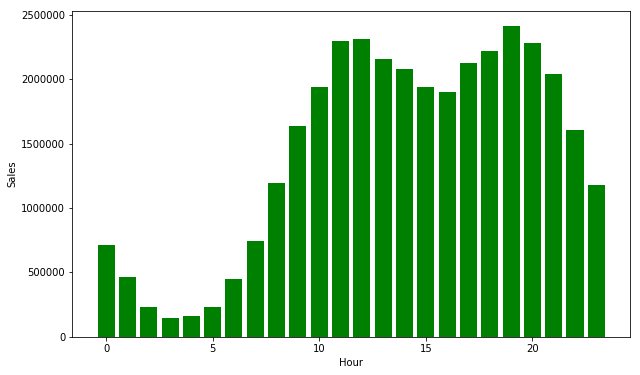

In [72]:
plt.figure(figsize=(10,6))

plt.bar(c["Hour"],c["Sales"],color="green")
plt.xlabel("Hour")
plt.ylabel("Sales")
plt.show()

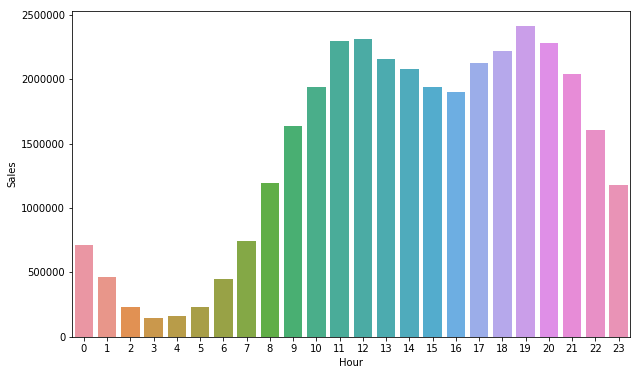

In [75]:
plt.figure(figsize=(10,6))

sns.barplot(c["Hour"],c["Sales"])
plt.show()

In [78]:
d=all_data.groupby("Hour").count().reset_index()
d

,Hour,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Min
0,0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,3,831,831,831,831,831,831,831,831,831,831
4,4,854,854,854,854,854,854,854,854,854,854
5,5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256
9,9,8748,8748,8748,8748,8748,8748,8748,8748,8748,8748


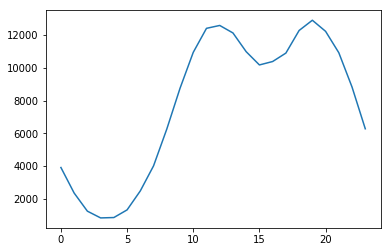

In [80]:
plt.plot(d["Hour"],d["Quantity Ordered"])

Products are most often sold together

### Products are most often sold together

In [81]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Min
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


In [86]:
df=all_data[all_data["Order ID"].duplicated(keep=False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Min
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,31


In [ ]:
df["Grouped"]=df.groupby()

In [99]:
m=df.groupby("Order ID")["Product"]

3                      Google Phone
4                  Wired Headphones
18                     Google Phone
19             USB-C Charging Cable
30       Bose SoundSport Headphones
                    ...            
11628         AA Batteries (4-pack)
11639              Wired Headphones
11640        AAA Batteries (4-pack)
11677                  Google Phone
11678          USB-C Charging Cable
Name: Product, Length: 14649, dtype: object

#### which product Sold the most and why?

In [100]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Min
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


In [104]:
group_product=all_data.groupby("Product").sum().reset_index()
group_product

,Product,Quantity Ordered,Price Each,Month,Sales,Hour,Min
0,20in Monitor,4129,451068.99,29336,454148.71,58764,122252
1,27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
2,27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
3,34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
4,AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
5,AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
6,Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
7,Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
8,Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789
9,Google Phone,5532,3315000.00,38305,3319200.00,79479,162773


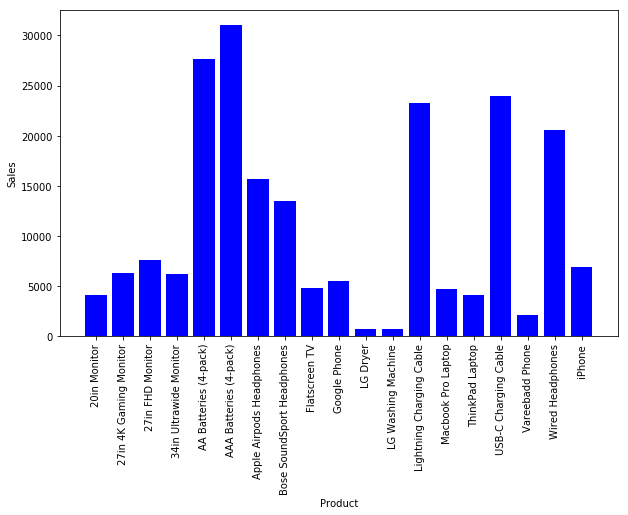

In [117]:
plt.figure(figsize=(10,6))

plt.bar(group_product["Product"],group_product["Quantity Ordered"],color="blue")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.xticks(group_product["Product"],rotation="vertical")
plt.show()